<a href="https://colab.research.google.com/github/YugyeongJo/Making_GitProgram_Project/blob/main/data_analysis/yugyeong/CDA_YG_KeywordRatings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Settings

In [ ]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.4 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats

import json
import ast

# The Movies Dataset CDA

### 분석 내용 :  키워드와 고객 평점 간의 상관관계 분석

#### 가설 설정
- 귀무가설 : 키워드와 영화 평점 사이에 상관관계가 없다.
- 대립가설 : 키워드와 영화 평점 사이에 상관관계가 있다.

### Dataset Road

In [ ]:
# CSV 파일 경로 지정
file_path01 = '/content/drive/MyDrive/SeSac 데이터 AI개발과정 mini project/dataset/original_movie_data/keywords.csv'
file_path02 = '/content/drive/MyDrive/SeSac 데이터 AI개발과정 mini project/dataset/original_movie_data/movies_metadata.csv'

# CSV 파일을 DataFrame으로 읽어오기
df_keywords = pd.read_csv(file_path01)
df_meta = pd.read_csv(file_path02)

<ipython-input-4-6142afaaba45>:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv(file_path02)


### Dataset merge

In [ ]:
# 중요한 컬럼만 추출
df_meta = df_meta[['id', 'vote_average']]  # 영화 ID와 평점만 사용

In [ ]:
# 'id' 기준으로 병합 (필요에 따라 타입 변환)
df_meta['id'] = pd.to_numeric(df_meta['id'], errors='coerce')
df_keywords['id'] = pd.to_numeric(df_keywords['id'], errors='coerce')

In [ ]:
# 병합 (left join)
df_merged = pd.merge(df_meta, df_keywords, on='id', how='inner')

In [ ]:
df_merged.head()

,id,vote_average,keywords
0,862.0,7.7,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844.0,6.9,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602.0,6.5,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357.0,6.1,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862.0,5.7,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


### Dataset 전처리

In [ ]:
# 키워드 리스트로 변환
df_merged['keywords'] = df_merged['keywords'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)])

In [ ]:
df_merged[['id', 'keywords']].head()

,id,keywords
0,862.0,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844.0,"[board game, disappearance, based on children'..."
2,15602.0,"[fishing, best friend, duringcreditsstinger, o..."
3,31357.0,"[based on novel, interracial relationship, sin..."
4,11862.0,"[baby, midlife crisis, confidence, aging, daug..."


### 상관관계 분석 방법
- 카운트 기반 분석
- 키워드 빈도와 평점의 상관관계
- 회귀분석
- 상관계수(Correlation Coefficient)

In [ ]:
# 카운드 기반 분석

from collections import Counter

# 각 키워드의 빈도 계산
keyword_counts = Counter([keyword for keywords in df_merged['keywords'] for keyword in keywords])

# 특정 키워드가 포함된 영화들의 평균 평점 계산
keyword_avg_rating = {}
for keyword in keyword_counts.keys():
    avg_rating = df_merged[df_merged['keywords'].apply(lambda x: keyword in x)]['vote_average'].mean()
    keyword_avg_rating[keyword] = avg_rating

# 평점이 높은 상위 10개의 키워드 출력
sorted_avg_rating = sorted(keyword_avg_rating.items(), key=lambda x: x[1], reverse=True)
sorted_avg_rating[:10]

[('simon magus', 10.0),
 ('dictaphone', 10.0),
 ('annuity', 10.0),
 ('beneficiary', 10.0),
 ('evening gown', 10.0),
 ('macbeth', 10.0),
 ('jeepney', 10.0),
 ('songwriting', 10.0),
 ('skyjacker', 10.0),
 ('lion tamer', 10.0)]

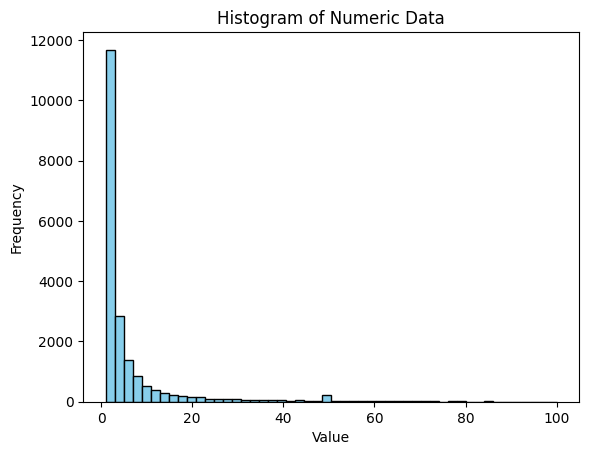

In [ ]:
keyword_dist = []
for k, v in keyword_counts.items():
    if v > 100:
      keyword_dist.append(50)
    else:
      keyword_dist.append(v)

# Create histogram
plt.hist(keyword_dist, bins=50, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Histogram of Numeric Data")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show plot
plt.show()

In [ ]:
sorted_avg_rating[:100]

[('simon magus', 10.0),
 ('dictaphone', 10.0),
 ('annuity', 10.0),
 ('beneficiary', 10.0),
 ('evening gown', 10.0),
 ('macbeth', 10.0),
 ('jeepney', 10.0),
 ('songwriting', 10.0),
 ('skyjacker', 10.0),
 ('lion tamer', 10.0),
 ('franklin the turtle', 10.0),
 ('juggling coconuts', 10.0),
 ('english in foreign countries', 10.0),
 ('mock trial', 10.0),
 ('yacht and yachting', 10.0),
 ('intertwined lives', 10.0),
 ('circus clown', 10.0),
 ('fukushima', 10.0),
 ('syndicate', 10.0),
 ('supper club', 10.0),
 ('old fashioned', 10.0),
 ('relish', 10.0),
 ('fine dining', 10.0),
 ('fish fry', 10.0),
 ('wisconsin supper club', 10.0),
 ('tray', 10.0),
 ('local food', 10.0),
 ('bruceploitation', 10.0),
 ('scott hall', 10.0),
 ('islamophobia', 10.0),
 ('lenny bruce', 9.5),
 ('detroit pistons', 9.5),
 ('quiet riot', 9.5),
 ('vaping', 9.5),
 ('big tobacco', 9.5),
 ('farm crisis', 9.3),
 ('greatest', 9.3),
 ('nhl', 9.3),
 ('robert e lee', 9.2),
 ('backyard wrestling', 9.0),
 ('longest film', 9.0),
 ('bel

In [ ]:
# 키워드 빈도와 평점의 상관관계

# 각 영화별 키워드 빈도 계산 (1개의 영화에 대해 키워드의 총합)
df_merged['keyword_count'] = df_merged['keywords'].apply(lambda x: len(x))

# 키워드 빈도와 평점의 상관관계 계산
keyword_count_corr = df_merged['keyword_count'].corr(df_merged['vote_average'])
print(f"키워드 빈도와 평점의 상관관계: {keyword_count_corr}")

키워드 빈도와 평점의 상관관계: 0.16618350319293915


In [ ]:
# 회귀분석
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

# 결측값 제거
df_cleaned = df_merged.dropna(subset=['vote_average'])

# 키워드 벡터화 (Bag of Words 방식)
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
X = vectorizer.fit_transform(df_cleaned['keywords'])

# 평점을 목표 변수로 설정
y = df_cleaned['vote_average']

# 회귀 분석 모델 학습
model = LinearRegression()
model.fit(X, y)

# 회귀 분석 결과 (회귀 계수 상위 10개의 키워드)
coef = model.coef_
keywords = vectorizer.get_feature_names_out()
top_keywords = sorted(zip(keywords, coef), key=lambda x: x[1], reverse=True)
top_keywords[:10]  # 평점에 긍정적인 영향을 미치는 키워드

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[('ymca', 17.8742700031878),
 ('transience', 16.381354995596872),
 ('lower class', 15.309804893891725),
 ('hopeless', 15.259473618524531),
 ('ice melting', 14.935127273025417),
 ('sold into slavery', 14.644643735874116),
 ('tech noir', 14.184819699088806),
 ('deforestation', 13.10275585663247),
 ('game warden', 12.279716651235107),
 ('child prostitution', 11.900475727669562)]

In [ ]:
# 상관계수(Correlation Coefficient)

# 키워드 존재 여부를 0과 1로 변환
keyword_matrix = X.toarray()  # 영화별 키워드 벡터

# DataFrame으로 변환하여 평점과 결합
keyword_df = pd.DataFrame(keyword_matrix, columns=vectorizer.get_feature_names_out())
final_df = pd.concat([df_merged['vote_average'].reset_index(drop=True), keyword_df], axis=1)

# 평점과 각 키워드 간의 상관계수 계산
correlation = final_df.corr()

# 상관관계가 높은 상위 10개의 키워드
keyword_corr = correlation['vote_average'].sort_values(ascending=False)
keyword_corr.head(10)

### 결과 시각화

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


### 상관관계 분석을 통한 가설 검정
- 피어슨 상관계수를 계산, p-value 확인

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.stats import pearsonr

# CSV 파일 경로 지정
file_path01 = '/content/drive/MyDrive/SeSac 데이터 AI개발과정 mini project/dataset/original_movie_data/keywords.csv'
file_path02 = '/content/drive/MyDrive/SeSac 데이터 AI개발과정 mini project/dataset/original_movie_data/movies_metadata.csv'

# 데이터 불러오기
df_keywords = pd.read_csv(file_path01)
df_meta = pd.read_csv(file_path02)

# 데이터 타입 일치화
df_keywords['id'] = df_keywords['id'].astype(str)
df_meta['id'] = df_meta['id'].astype(str)

# 데이터 병합 및 결측값 제거
df_merged = pd.merge(df_meta[['id', 'vote_average']], df_keywords, on='id', how='inner')
df_cleaned = df_merged.dropna(subset=['vote_average'])

# 키워드 벡터화 (Bag of Words 방식)
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
X = vectorizer.fit_transform(df_cleaned['keywords'])

# 평점을 목표 변수로 설정
y = df_cleaned['vote_average']

# 차원 축소 (TruncatedSVD 사용)
svd = TruncatedSVD(n_components=50)  # n_components는 선택 사항, 적절한 값으로 설정
X_svd = svd.fit_transform(X)

# 차원 축소된 데이터와 평점 간의 상관관계 분석
df_svd = pd.DataFrame(X_svd)
df_svd['vote_average'] = df_cleaned['vote_average'].values

# 상관관계 계산
correlation_svd = df_svd.corr()['vote_average']
print("PCA 차원 축소 후 평점과의 상관관계:")
print(correlation_svd)


### 장르별

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ast

# CSV 파일 경로 지정
file_path01 = '/content/drive/MyDrive/SeSac 데이터 AI개발과정 mini project/dataset/original_movie_data/keywords.csv'
file_path02 = '/content/drive/MyDrive/SeSac 데이터 AI개발과정 mini project/dataset/original_movie_data/movies_metadata.csv'

# CSV 파일을 DataFrame으로 읽어오기 (low_memory=False 옵션 추가)
df_keywords = pd.read_csv(file_path01, low_memory=False)
df_meta = pd.read_csv(file_path02, low_memory=False)

# 'id' 열을 문자열로 변환
df_keywords['id'] = df_keywords['id'].astype(str)
df_meta['id'] = df_meta['id'].astype(str)

# 필요한 컬럼만 선택
df_meta = df_meta[['id', 'title', 'genres', 'vote_average']]
df_keywords = df_keywords[['id', 'keywords']]

# 데이터 병합
df = pd.merge(df_meta, df_keywords, on='id')

In [ ]:
# 누락된 값 처리
df = df.dropna(subset=['id', 'title', 'genres', 'vote_average', 'keywords'])

In [ ]:
# 'vote_average'를 float 타입으로 변환
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

In [ ]:
# genres와 keywords 파싱 함수 수정
def parse_json(x):
    try:
        parsed = ast.literal_eval(x)
        return [i['name'] for i in parsed if isinstance(i, dict) and 'name' in i]
    except:
        return []

df['genres'] = df['genres'].apply(parse_json)
df['keywords'] = df['keywords'].apply(parse_json)

In [ ]:
# 데이터 전처리: 장르와 키워드를 개별 행으로 분리
df_exploded = df.explode('genres').explode('keywords')

In [ ]:
# 빈 문자열 및 None 값 제거
df_exploded = df_exploded[df_exploded['genres'].notna() & (df_exploded['genres'] != '')]
df_exploded = df_exploded[df_exploded['keywords'].notna() & (df_exploded['keywords'] != '')]

In [ ]:
# 2. 키워드와 평점 간 상관관계 분석
keyword_votes = df_exploded.groupby('keywords')['vote_average'].mean()
correlation = np.corrcoef(keyword_votes.index.factorize()[0], keyword_votes.values)[0, 1]
t_stat, p_value = stats.ttest_ind(df_exploded['keywords'].factorize()[0], df_exploded['vote_average'])

print(f"Correlation between keywords and vote average: {correlation}")
print(f"T-statistic: {t_stat}, p-value: {p_value}")

In [ ]:
# 3. 장르별 분석
genre_keyword_votes = df_exploded.groupby(['genres', 'keywords'])['vote_average'].mean()
top_keywords_by_genre = genre_keyword_votes.groupby('genres').nlargest(10)

In [ ]:
# 4. 시각화
def generate_wordcloud(genre):
    try:
        keywords = top_keywords_by_genre.loc[genre]
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(keywords))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Top Keywords for {genre}')
        plt.show()
    except Exception as e:
        print(f"Error generating wordcloud for genre '{genre}': {str(e)}")
        print(f"Keywords for this genre: {dict(top_keywords_by_genre.loc[genre])}")

In [ ]:
# 상위 5개 장르에 대해 워드클라우드 생성
top_genres = df_exploded['genres'].value_counts().nlargest(5).index
for genre in top_genres:
    generate_wordcloud(genre)

In [ ]:
# 막대 그래프 생성
def plot_top_keywords(genre):
    try:
        keywords = top_keywords_by_genre.loc[genre]
        plt.figure(figsize=(12, 6))
        keywords.plot(kind='bar')
        plt.title(f'Top 10 Keywords for {genre}')
        plt.xlabel('Keywords')
        plt.ylabel('Average Vote')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting bar graph for genre '{genre}': {str(e)}")
        print(f"Keywords for this genre: {dict(top_keywords_by_genre.loc[genre])}")

In [ ]:
# 상위 5개 장르에 대해 막대 그래프 생성
for genre in top_genres:
    plot_top_keywords(genre)